In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import gseapy
import matplotlib.pyplot as plt

sc.settings.verbosity = 2             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

In [2]:
sc.settings.set_figure_params(dpi=80)

In [3]:
#cd scanpy-tutorials-master

In [4]:
adata = sc.read('./write/bkknn_adult.h5ad')

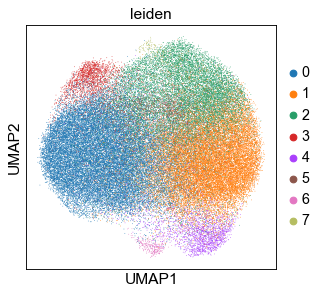

In [5]:
sc.pl.umap(adata, color=['leiden'])

In [6]:
#number of cells
print(adata.obs['age'].value_counts())

adata

adult    66905
Name: age, dtype: int64


AnnData object with n_obs × n_vars = 66905 × 179
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'age', 'muscle', 'sample', 'batch', 'leiden', 'cell type'
    var: 'gene_ids', 'feature_types', 'mt', 'highly_variable', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'mean-0', 'std-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'mean-1', 'std-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'means-2', 'dispersions-2', 'dispersions_norm-2', 'mean-2', 'std-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'means-3', 'dispersions-3', 'dispersions_norm-3', 'mean-3', 'std-3', 'n_cells-4', 'n_cells_by_counts-4', 'mean_counts-4', 'pct_dropout_by_

In [7]:
target_cells = 11000

In [8]:
sc.pp.subsample(adata, n_obs=target_cells)

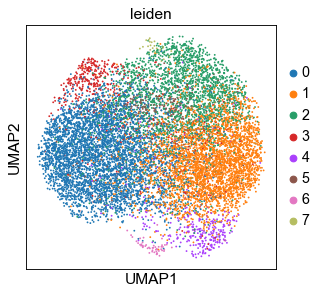

In [9]:
sc.pl.umap(adata, color='leiden')

In [10]:
# check the number of cells per cluster
print(adata.obs['leiden'].value_counts())

adata

0    4213
1    3362
2    2223
3     492
4     333
5     299
6      50
7      28
Name: leiden, dtype: int64


AnnData object with n_obs × n_vars = 11000 × 179
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'age', 'muscle', 'sample', 'batch', 'leiden', 'cell type'
    var: 'gene_ids', 'feature_types', 'mt', 'highly_variable', 'n_cells-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'mean-0', 'std-0', 'n_cells-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'mean-1', 'std-1', 'n_cells-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'means-2', 'dispersions-2', 'dispersions_norm-2', 'mean-2', 'std-2', 'n_cells-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'means-3', 'dispersions-3', 'dispersions_norm-3', 'mean-3', 'std-3', 'n_cells-4', 'n_cells_by_counts-4', 'mean_counts-4', 'pct_dropout_by_

In [12]:
#save new downsample object
save_file = './write/bkknn_adult_small.h5ad'
adata.write_h5ad(save_file)
